In [30]:
import pandas as pd
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
file_path = path.join('..', 'data', 'masked','new_achs_accidents_data.csv')

classified_occupations = pd.read_csv('gpt_results.csv', names=['index', 'ocupacion', 'clasificacion-oit'], on_bad_lines='skip', header=0)
new_achs_accidents_data = pd.read_csv(file_path)
merged_occupations = pd.merge(new_achs_accidents_data, classified_occupations, on='ocupacion', how='outer')
merged_occupations.head()

,id_siniestro,tipo_siniestro,numero_paciente,texto,poblacion,ocupacion,edad,sexo,relato_admision,mecanismo,fecha_creacion,index,clasificacion-oit
0,7242104.0,2.0,1.007055e+09,"INGRESA DEAMBULANDO POR SUS PROPIOS MEDIOS, SI...",CHONCHI,Operario,22.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA EN LA GARITA E...,12.1,2022-01-03,NaN,NaN
1,7334521.0,1.0,1.001202e+09,"\nCLONIXINATO LISINA 125 MG (A), ORAL, 125MG, ...",TOME,Operario,56.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA TIRANDO UN CAR...,33.1,2022-03-28,NaN,NaN
2,7384705.0,2.0,1.006225e+09,"\nPREGABALINA 75 MG (A), ORAL, 75MG, C/24 HRS ...",LA PINTANA,Operario,36.0,femenino,AL MOMENTO DEL ACCIDENTE ESTABA LLEVANDO A MI ...,12.1,2022-05-13,NaN,NaN
3,7395732.0,1.0,1.007163e+09,Ley\nSTP\nCuraciones\nIbuprofeno 400mg cada 8 ...,CHILLÁN,Operario,23.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA DESARMANDO UNA...,23.1,2022-05-24,NaN,NaN
4,7482449.0,1.0,1.005783e+09,"\nGENTAMICINA 0,3% - BETAMETASONA 0,1% / 5 ML ...",CHONCHI,Operario,27.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA OPERANDO LA GR...,81.4,2022-08-10,NaN,NaN


In [32]:
df=merged_occupations[merged_occupations['edad'].isna()==False]


In [50]:
df=merged_occupations[merged_occupations['edad']>=18]

In [51]:
df.describe()

,id_siniestro,tipo_siniestro,numero_paciente,edad,mecanismo
count,3.418900e+05,341890.000000,3.418900e+05,341890.000000,341890.000000
mean,7.640711e+06,1.237421,1.005006e+09,41.467408,55.384281
std,2.247948e+05,0.425503,2.266876e+06,13.221480,34.432114
min,4.533661e+06,1.000000,1.000000e+09,18.000000,11.100000
25%,7.445308e+06,1.000000,1.003078e+09,31.000000,12.100000
50%,7.644479e+06,1.000000,1.005681e+09,39.000000,54.100000
75%,7.832465e+06,1.000000,1.007152e+09,52.000000,91.200000
max,8.036353e+06,2.000000,1.007563e+09,124.000000,92.200000


In [52]:
df['fecha_creacion']= pd.to_datetime(df['fecha_creacion'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18412\2604094246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha_creacion']= pd.to_datetime(df['fecha_creacion'])


In [53]:
df_colum_year= df.copy()
df_colum_year['year']= df['fecha_creacion'].dt.year
df_colum_year['year']=df_colum_year['year'].astype(str)
df_colum_year['day_number']= df['fecha_creacion'].dt.day_of_year
df_colum_year['month']= df['fecha_creacion'].dt.month
df_colum_year['day_of_week'] = df_colum_year['fecha_creacion'].dt.day_name()
df_colum_year['year'].describe()

count     341890
unique         2
top         2023
freq      172133
Name: year, dtype: object

In [54]:
edades_general = {}
for i in range(125):
    if 0<=i<18:
        edades_general[i]='infante'
    if 18<=i< 24:
        edades_general[i]='[18,24)'
    if 24<=i< 34:
        edades_general[i]='[24,34)'
    if 34<=i< 44:
        edades_general[i]='[34,44)'
    if 44<=i< 54:
        edades_general[i]='[44,54)'
    if 54 <=i< 65:
        edades_general[i]='[54,65)'
    if i>=65:
        edades_general[i]='mayores de 65 años'



edades_general['nan']= 'sin informacion'



In [55]:
df_colum_year['age_group']=df_colum_year.apply(lambda row: edades_general[row['edad']], axis=1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18412\2801431858.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, '[18,24)'),
 Text(1, 0, '[24,34)'),
 Text(2, 0, '[34,44)'),
 Text(3, 0, '[44,54)'),
 Text(4, 0, '[54,65)'),
 Text(5, 0, 'mayores de 65 años')]

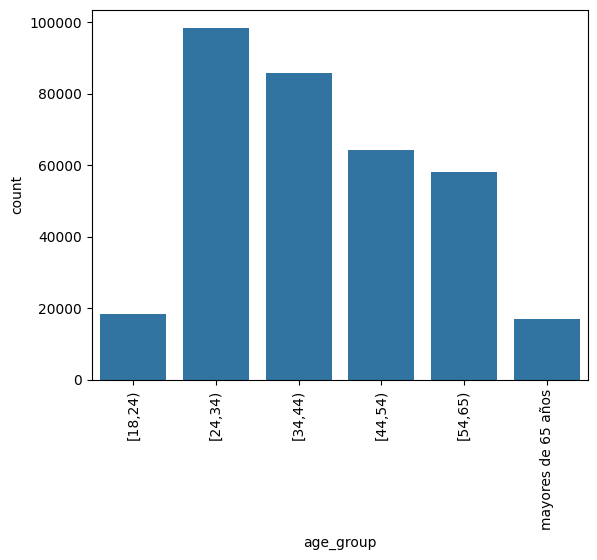

In [56]:
df_etario = df_colum_year.groupby(['age_group']).size().reset_index(name='count')

ax= sns.barplot(y='count', x='age_group', data= df_etario)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [39]:
df_colum_year.groupby(['age_group']).size().reset_index(name='count').head(7)


,age_group,count
0,"[18,24)",18430
1,"[24,34)",98475
2,"[34,44)",85778
3,"[44,54)",64335
4,"[54,65)",57946
5,infante,124
6,mayores de 65 años,16926


In [40]:
df_colum_year[ (df_colum_year['year']=='2023')].groupby(['edad']).size().reset_index(name='count').mean()

edad       52.755556
count    1913.233333
dtype: float64

In [41]:
df_colum_year[ (df_colum_year['year']=='2022')].groupby(['edad']).size().reset_index(name='count').mean()

edad       51.057471
count    1951.988506
dtype: float64

In [42]:
df_colum_year[(df_colum_year['sexo']=='femenino') & (df_colum_year['year']=='2023')].groupby(['edad']).size().reset_index(name='count').mean()

edad      51.405063
count    976.075949
dtype: float64

In [43]:
df_colum_year[(df_colum_year['sexo']=='masculino') & (df_colum_year['year']=='2023')].groupby(['edad']).size().reset_index(name='count').mean()

edad       50.588235
count    1118.600000
dtype: float64

In [44]:
df_colum_year[(df_colum_year['sexo']=='femenino') & (df_colum_year['year']=='2022')].groupby(['edad']).size().reset_index(name='count').mean()

edad      49.5250
count    920.0125
dtype: float64

In [45]:
df_colum_year[(df_colum_year['sexo']=='masculino') & (df_colum_year['year']=='2022')].groupby(['edad']).size().reset_index(name='count').mean()

edad       52.738095
count    1145.476190
dtype: float64

In [46]:
df_colum_year[(df_colum_year['sexo']=='masculino') & (df_colum_year['year']=='2023')].describe()

,id_siniestro,tipo_siniestro,numero_paciente,edad,mecanismo,fecha_creacion,day_number,month
count,9.508100e+04,95081.000000,9.508100e+04,95081.000000,95081.000000,95081,95081.000000,95081.000000
mean,7.830338e+06,1.197316,1.004886e+09,40.854776,57.139143,2023-06-28 05:31:57.771163648,179.230530,6.399806
min,4.533661e+06,1.000000,1.000000e+09,0.000000,11.100000,2023-01-01 00:00:00,1.000000,1.000000
25%,7.730384e+06,1.000000,1.002716e+09,30.000000,23.100000,2023-03-28 00:00:00,87.000000,3.000000
50%,7.829058e+06,1.000000,1.005508e+09,38.000000,54.200000,2023-06-24 00:00:00,175.000000,6.000000
75%,7.928227e+06,1.000000,1.007297e+09,51.000000,91.200000,2023-10-02 00:00:00,275.000000,10.000000
max,8.036353e+06,2.000000,1.007563e+09,124.000000,92.200000,2023-12-31 00:00:00,365.000000,12.000000
std,1.136055e+05,0.397975,2.363732e+06,13.573183,33.528337,NaN,105.520198,3.461662


In [47]:
df_colum_year[(df_colum_year['sexo']=='femenino') & (df_colum_year['year']=='2023')].describe()

,id_siniestro,tipo_siniestro,numero_paciente,edad,mecanismo,fecha_creacion,day_number,month
count,7.711000e+04,77110.000000,7.711000e+04,77110.000000,77110.000000,77110,77110.000000,77110.000000
mean,7.836775e+06,1.295591,1.005333e+09,41.573233,48.462575,2023-07-04 03:43:19.787316736,185.155090,6.596836
min,7.641280e+06,1.000000,1.000000e+09,0.000000,11.100000,2023-01-01 00:00:00,1.000000,1.000000
25%,7.741986e+06,1.000000,1.003630e+09,31.000000,12.100000,2023-04-06 00:00:00,96.000000,4.000000
50%,7.833659e+06,1.000000,1.006081e+09,40.000000,33.100000,2023-06-29 00:00:00,180.000000,6.000000
75%,7.933735e+06,2.000000,1.007363e+09,52.000000,91.160000,2023-10-05 00:00:00,278.000000,10.000000
max,8.031705e+06,2.000000,1.007560e+09,121.000000,92.200000,2023-12-31 00:00:00,365.000000,12.000000
std,1.108999e+05,0.456311,2.182675e+06,12.673668,34.945034,NaN,103.551955,3.396452


In [48]:
df_colum_year[(df_colum_year['sexo']=='masculino') & (df_colum_year['year']=='2022')].describe()

,id_siniestro,tipo_siniestro,numero_paciente,edad,mecanismo,fecha_creacion,day_number,month
count,9.622000e+04,96220.000000,9.622000e+04,96220.000000,96220.00000,96220,96220.000000,96220.000000
mean,7.441969e+06,1.189545,1.004744e+09,41.334057,61.28799,2022-07-03 06:06:06.360423936,184.254240,6.564290
min,7.241680e+06,1.000000,1.000000e+09,1.000000,11.10000,2022-01-01 00:00:00,1.000000,1.000000
25%,7.341278e+06,1.000000,1.002620e+09,30.000000,32.10000,2022-04-01 00:00:00,91.000000,4.000000
50%,7.439936e+06,1.000000,1.005326e+09,39.000000,81.40000,2022-07-02 00:00:00,183.000000,7.000000
75%,7.543188e+06,1.000000,1.007064e+09,52.000000,91.20000,2022-10-05 00:00:00,278.000000,10.000000
max,7.976161e+06,2.000000,1.007409e+09,124.000000,92.20000,2022-12-31 00:00:00,365.000000,12.000000
std,1.157951e+05,0.391943,2.303392e+06,13.661214,33.01222,NaN,105.925451,3.464194


In [49]:
df_colum_year[(df_colum_year['sexo']=='femenino') & (df_colum_year['year']=='2022')].describe()

,id_siniestro,tipo_siniestro,numero_paciente,edad,mecanismo,fecha_creacion,day_number,month
count,7.360100e+04,73601.000000,7.360100e+04,73601.000000,73601.00000,73601,73601.000000,73601.000000
mean,7.450099e+06,1.291029,1.005161e+09,42.257293,52.65766,2022-07-10 14:23:11.165880832,191.599435,6.806674
min,7.241760e+06,1.000000,1.000000e+09,0.000000,11.10000,2022-01-01 00:00:00,1.000000,1.000000
25%,7.353238e+06,1.000000,1.003513e+09,32.000000,12.10000,2022-04-13 00:00:00,103.000000,4.000000
50%,7.450329e+06,1.000000,1.005895e+09,41.000000,53.10000,2022-07-12 00:00:00,193.000000,7.000000
75%,7.551717e+06,2.000000,1.007124e+09,53.000000,91.20000,2022-10-13 00:00:00,286.000000,10.000000
max,7.953806e+06,2.000000,1.007412e+09,124.000000,92.20000,2022-12-31 00:00:00,365.000000,12.000000
std,1.142081e+05,0.454240,2.118610e+06,12.772729,35.29479,NaN,104.086894,3.404481
